<a href="https://colab.research.google.com/github/sbarreto10/AnalisisNumerico/blob/main/LaboNumerico/numerico_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import io
from IPython.display import HTML
import base64
from google.colab import files
import pandas as pd
import random
import numpy as np
import warnings

#Color

In [2]:
def rgb_a_hex(rgb):
    r, g, b = rgb
    hex_code = "#{:02x}{:02x}{:02x}".format(r, g, b)
    return hex_code

# ERRORES

#### Aproximación del seno



In [ ]:
def Aj(ang, j):
  return (pow(-1, j)*pow(ang, 2*j + 1)) / math.factorial(2*j + 1)

In [ ]:
ang = math.pi/3
s = math.sin(ang)
n = 15
An = [Aj(ang, i) for i in range(n)]
Sn = [sum(An[:(i+1)]) for i in range(n)]

In [ ]:
pd.set_option('display.float_format', '{:.6g}'.format)
pd.set_option('display.float_format', lambda x: '%.6g' % x if abs(x) < 10**-3 or abs(x) >= 10**6 else '%.2e' % x)
pd.DataFrame({"n": [i+1 for i in range(n)], 
              "j": [i for i in range(n)], 
              "Aj": An, 
              "Sj": Sn, 
              "e": [round(abs(Sn[i]-s), 15) for i in range(n)]})

#### Corrimiento de la coma de π

In [ ]:
n=30

shifted_pi = [math.pi*pow(10,i) for i in range(n)]
shifted_pi_z = [math.floor(sp) for sp in shifted_pi]
shifted_pi_d = [shifted_pi[i] - shifted_pi_z[i] for i in range(n)]
_shifted_pi = [shifted_pi_d[i]*pow(10,i) for i in range(n)]
_shifted_pi_z = [math.floor(sp) for sp in _shifted_pi]
_shifted_pi_d = [_shifted_pi[i] - _shifted_pi_z[i] for i in range(n)]

pd.set_option('display.float_format', lambda x: '%.15f' % x)
df1 = pd.DataFrame({"n": [i+1 for i in range(n)], 
              "π * 10^n": shifted_pi, 
              "parte entera": shifted_pi_z, 
              "parte decimal": shifted_pi_d, 
              "_* 10^n": _shifted_pi,
              "_parte entera": _shifted_pi_z, 
              "_parte decimal": _shifted_pi_d})
df1

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7), dpi=120)

axs[0,0].plot(df1["parte decimal"])
axs[0,0].set_title("parte decimal")
axs[0,1].plot(df1["parte entera"])
axs[0,1].set_title("parte entera")
axs[1,0].plot(df1["_parte decimal"])
axs[1,0].set_title("_parte decimal")
axs[1,1].plot(df1["_parte entera"])
axs[1,1].set_title("_parte entera")

#### Correcta expresión de un resultado

In [ ]:
def expresion(estimacion, cota):
  r=cota
  t=0
  while(math.floor(r) == 0):
    r *= 10
    t += 1
  if t == 0:
    t=-1
    while(math.floor(r) != 0):
      r /= 10
      t += 1
    t = t if r < 0.5 else t+1
    return round(estimacion / pow(10,t)) * pow(10,t), round(cota), 0
  ds = t if math.floor(r) < 5 else t-1
  return round(estimacion,ds), round(math.ceil(cota*(10**t))*(10**-t), t), ds

In [ ]:
for i in range(10):
  x, e, t = expresion(random.random()*random.randrange(10), random.random()*random.random()*random.random()) if random.random()<0.5 else expresion(random.random()*random.randrange(1000), random.random()*random.randrange(100))
  print(str(x) + " ± " + str(e))

1.0 ± 1.0
5.5 ± 0.2
180 ± 32
170 ± 28
570 ± 19
30 ± 24
570 ± 7
50 ± 18
4.26 ± 0.05
2.4 ± 0.1


#### Underflow

In [ ]:
underflow = []
minnum = [False, 0]
for j in range(1000):
  x = 1.0
  for i in range(j):
    x /= 10
  if not minnum[0] and x == 0:
    minnum = [True, underflow[j-1]]
  underflow.append(x)

print("mínimo representable: " + str(minnum[1]), end="\n")

fig, ax = plt.subplots()

ax.plot(underflow)
ax.set_yscale('log')
ax.set_xlim((0,324))
ax.set_xticks([i for i in range(0, 320, 20)] + [323])

plt.show()

#### Overflow

In [ ]:
overflow = []
maxnum = 0
x = 1.0
while 1:
    if x*2 == math.inf:
      maxnum = x
      break
    x = x * 2
    overflow.append(x)
  
print("máximo representable con print: " + str(maxnum), end="\n")
print("máximo representable en un plot: 2^64 (excluyente)")

fig, ax = plt.subplots()
warnings.filterwarnings("ignore", message="Attempt to set non-positive ylim on a log-scaled axis will be ignored.")
warnings.filterwarnings("ignore", category=RuntimeWarning)


ax.plot(overflow)
ax.set_yscale("log", base=2)
ax.set_ylim((0, 2**63))
ax.set_xlim((0, 64))
ax.set_xticks([i for i in range(0, 61, 10)] + [64])

plt.show()

#### APROXIMACIÓN INICIAL DE UNA DERIVADA PARCIAL

In [ ]:
def derivada_parcial(F, X, i, e):
  H = [X[j] if j!=i else X[j]+e for j in range(len(X))]
  return (F(*H) - F(*X)) / e

#### FÓRMULA DE PROPAGACIÓN LINEAL DE ERRORES DE ENTRADA

In [ ]:
def propagacion_lineal(F, X, dX):
  return sum([abs(derivada_parcial(F,X,i,dX[i]))*dX[i] for i in range(len(X))])

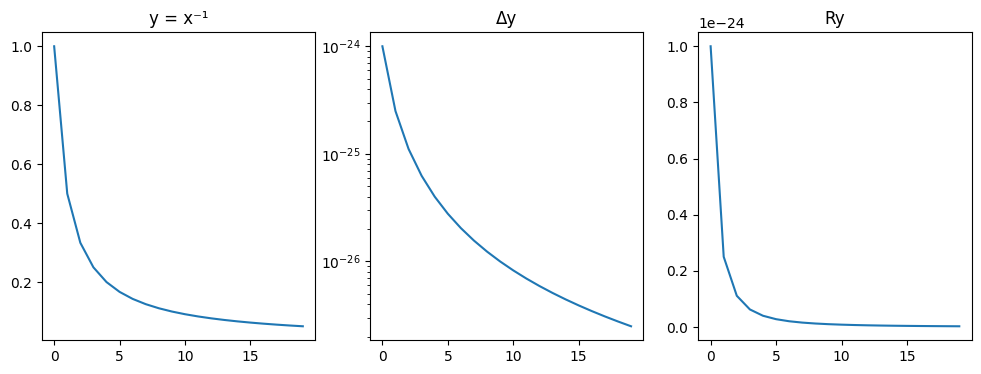

In [ ]:
inv = [1/k for k in range(1,21)]
inv_prop = [propagacion_lineal(lambda x: 1/(x+1), [k], [1E-8]) for k in range(20)]
inv_prop_r = [inv_prop[i]/inv[i] if inv[i]!=0 else inv_prop[i]/1E-8 for i in range(20)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
axs[0].plot(inv)
axs[1].plot(inv_prop)
axs[2].plot(inv_prop)
axs[0].set_title("y = x\u207B\u00B9")
axs[1].set_title("Δy")
axs[2].set_title("Ry")
axs[1].set_yscale("log")

plt.show()

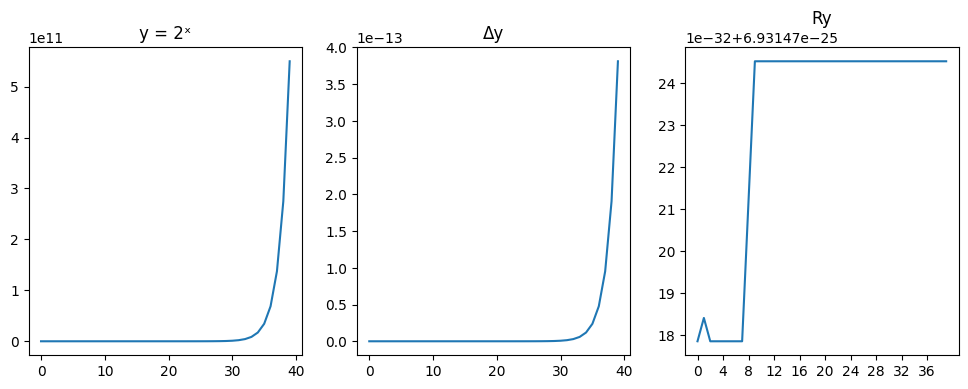

In [ ]:
exp = [2**k for k in range(40)]
exp_prop = [propagacion_lineal(lambda x: 2**x, [k], [1E-8]) for k in range(40)]
exp_prop_r = [exp_prop[i]/exp[i] if exp[i]!=0 else exp_prop[i]/1E-8 for i in range(40)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
axs[0].plot(exp)
axs[1].plot(exp_prop)
axs[2].plot(exp_prop_r)
axs[0].set_title("y = 2\u02E3")
axs[1].set_title("Δy")
axs[2].set_title("Ry")
axs[2].set_xticks([i for i in range(0,40,4)])

plt.show()

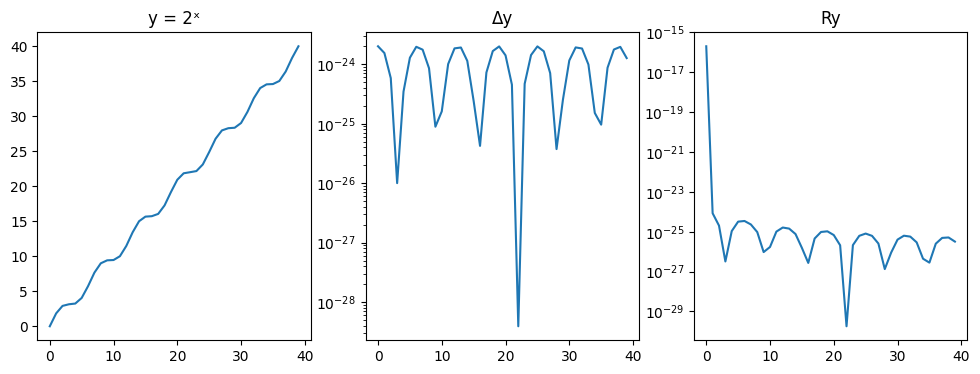

In [ ]:
sin_x = [math.sin(k)+k for k in range(40)]
sin_x_prop = [propagacion_lineal(lambda x: math.sin(x)+x, [k], [1E-8]) for k in range(40)]
sin_x_prop_r = [sin_x_prop[i]/sin_x[i] if sin_x[i]!=0 else sin_x_prop[i]/1E-8 for i in range(40)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
axs[0].plot(sin_x)
axs[1].plot(sin_x_prop)
axs[2].plot(sin_x_prop_r)
axs[0].set_title("y = 2\u02E3")
axs[1].set_title("Δy")
axs[2].set_title("Ry")
axs[1].set_yscale("log")
axs[2].set_yscale("log")

plt.show()

#### Efecto de cancelación de términos

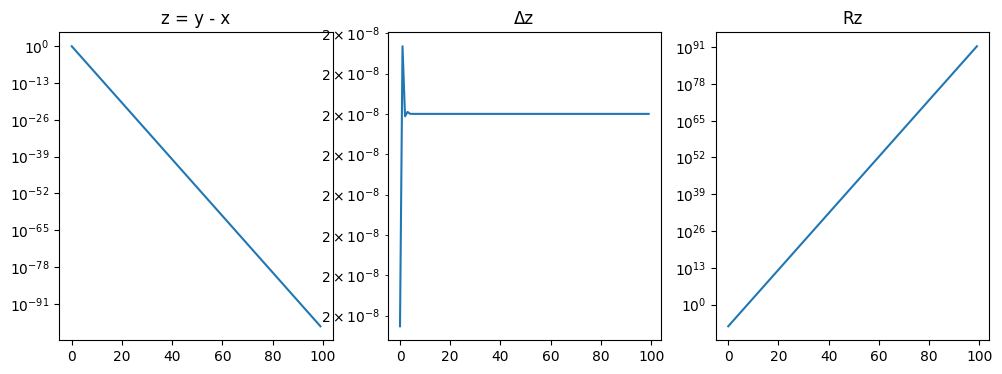

In [ ]:
Dxy = [10**-k for k in range(100)]
resta_xy_prop = [propagacion_lineal(lambda x,y: y-x, [1E-8,1E-8+d], [1E-8]*2) for d in Dxy]
resta_xy_prop_r = [resta_xy_prop[i]/Dxy[i] if Dxy[i]!=0 else resta_xy_prop[i]/1E-8 for i in range(100)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
axs[0].plot(Dxy)
axs[1].plot(resta_xy_prop)
axs[2].plot(resta_xy_prop_r)
axs[0].set_title("z = y - x")
axs[1].set_title("Δz")
axs[2].set_title("Rz")
axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")

plt.show()

#### Factor de amplificación de errores de entrada

In [ ]:
def factores_de_amplificacion(F, X, dX, e=1E-8):
  y = F(*X)
  y = y if y!=0 else e
  return [derivada_parcial(F,X,i,dX[i]) * (X[i]/y) for i in range(len(X))]

In [ ]:
def fa_por_incrementos(F, nF, logscale=False, xo=1, yo=1):
  sum_fa_inc_x = [factores_de_amplificacion(F, [k,yo], [1E-8]*2) for k in range(20)]
  sum_fa_inc_y = [factores_de_amplificacion(F, [xo,k], [1E-8]*2) for k in range(20)]
  sum_fa_inc_x_x, sum_fa_inc_x_y = [fa[0] for fa in sum_fa_inc_x], [fa[1] for fa in sum_fa_inc_x]
  sum_fa_inc_y_x, sum_fa_inc_y_y = [fa[0] for fa in sum_fa_inc_y], [fa[1] for fa in sum_fa_inc_y]
  sum_fa_inc_x_cp, sum_fa_inc_y_cp = [abs(sum_fa_inc_x_x[i]) + abs(sum_fa_inc_x_y[i]) for i in range(20)], [abs(sum_fa_inc_y_x[i]) + abs(sum_fa_inc_y_y[i]) for i in range(20)]
  

  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5), gridspec_kw={'wspace': 0.25})
  axs[0].plot(sum_fa_inc_x_x, label="fa_x")
  axs[0].plot(sum_fa_inc_x_y, linestyle="--", label="fa_y")
  axs[0].plot(sum_fa_inc_x_cp, lw=2,linestyle="--", dashes=(2,3), label="Cp")
  axs[1].plot(sum_fa_inc_y_x, label="fa_x")
  axs[1].plot(sum_fa_inc_y_y, linestyle="--", label="fa_y")
  axs[1].plot(sum_fa_inc_y_cp, lw=2, linestyle="--", dashes=(2,3), label="Cp")
  axs[0].set_title("factores de amplificación y estabilidad por Δx en F(x,y) = " + str(nF))
  axs[1].set_title("factores de amplificacióny estabilidad por Δy en F(x,y) = " + str(nF))

  axs[0].legend()
  axs[1].legend()
  if logscale:
    axs[0].set_yscale("log")
    axs[1].set_yscale("log")

  plt.show()

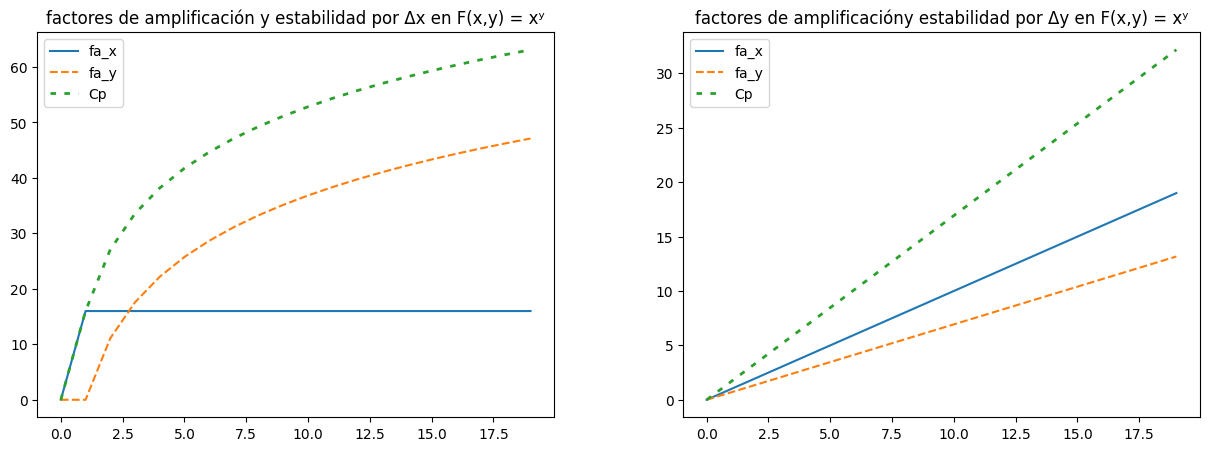

In [ ]:
F = [lambda x,y: x+y, lambda x,y: x-y, lambda x,y: x*y, lambda x,y: x/(y+1E-8), lambda x,y: pow(x,y)]
nF = ["x+y", "x-y", "x*y", "x/y", "x\u02b8"]

nf, logscale = 4, 0    # Numero de la funcion a mostrar y escala logarítmica on/off
xo, yo =       2, 16    # valor constante al variar y y valor constante al variar xo

fa_por_incrementos(F[nf], nF[nf], xo=xo, yo=yo, logscale=logscale)


#### ERRORES DE REDONDEO


In [ ]:
def U():
  u = 1.0
  while (1.0 + u) != 1.0:
      u /= 2.0
  return 2*u
U()

2.220446049250313e-16

# SEL

In [ ]:
def norma_2(x,y,z):
  return math.sqrt(x**2 + y**2 + z**2)

def norma_inf(x,y,z,a,b,c):
  return max(abs(x), abs(y), abs(z))

#### JACOBI / GAUSS-SEIDEL

In [ ]:
def Jacobi(A, b, semilla, despeje, Fe, tol_rel, GS):
  S, R = [semilla], [np.inf]
  k = 0

  while(R[k] >= tol_rel):
    k += 1
    S.append([None, None, None])
    for i in despeje:
      S[k][i] = b[i]
      for j in despeje:
        if j!=i:
          S[k][i] -= A[i][j]*S[k][j] if S[k][j] and GS else A[i][j]*S[k-1][j]  # ACA ESTÁ LA PARTICULARIDAD DE GAUSS-SEIDEL
      S[k][i] /= A[i][i]
    R.append(Fe(*(S[k]+S[k-1])))
    print(S[k])
  return S, R

def resolver_por_Jacobi(A, b, semilla=[0,0,0], despeje=[1,2,0], Fe=(lambda x,y,z,a,b,c: norma_2(x-a,y-b,z-c) / norma_2(x,y,z)), tol_rel=1E-3, GS=False):
  try: 
    return Jacobi(A, b, semilla, despeje, Fe, tol_rel, GS)
  except:
    print("El resultado no converge")
    return None, None

In [ ]:
comp = ["x", "y", "z"]

# MATRIZ CUYOS VALORES PROPIOS EN MÓDULO SON TODOS MENORES QUE 1 → CONVERGE SIN IMPORTAR b O LA SEMILLA
A = [[0.1,0.1,0.2],
     [0.1,0.2,0.3],
     [0.1,0.1,0.3]]

b = [0.5,0.5,0.5]

S, R = resolver_por_Jacobi(A, b, semilla=[1,1,1], tol_rel=0.05, GS=True)

if S:
  for i in range(len(S[-1])):
    x,d,t = expresion(S[-1][i], R[-1])
    print(comp[i] + ": {:.{}f}".format(x, t) + " ± " + str(d))


[2.1666666666666665, 0.5, 1.1666666666666667]
[3.222222222222222, -0.33333333333333354, 1.0555555555555556]
[4.046296296296295, -0.6944444444444442, 0.8240740740740742]
[4.617283950617282, -0.7592592592592586, 0.5709876543209879]
[4.966563786008229, -0.6651234567901232, 0.3492798353909469]
[5.146776406035665, -0.5072016460905349, 0.1802126200274353]
[5.212419981710104, -0.34370713305898526, 0.06564357567444039]
x: 5.21 ± 0.05
y: -0.34 ± 0.05
z: 0.07 ± 0.05


# PVI

#### Euler explícito

In [ ]:
def pvi_euler(t_o, u_o, F, exacta, h, N):
  h = h if type(h)==list else [h]*(N-1)
  t = [t_o]
  u = [u_o]
  g = [None]
  E = [exacta(t_o) - u_o]
  e = [None]
  for n in range(N-1):
    t.append(t[n] + h[n])
    u.append(u[n] + h[n]*F(t[n],u[n]))
    E.append(exacta(t[n+1])-u[n+1])
    e.append(exacta(t[n+1])-exacta(t[n])-h[0]*F(t[n], exacta(t[n])))
  return t, u, E, e

#### Ejemplo de EDO con r(x) lineal

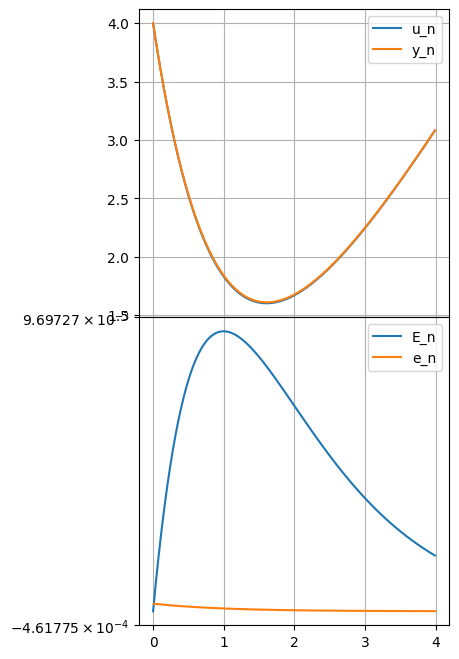

In [ ]:
N = 400
h = 0.01
F = lambda t,u: -u + t
exacta = lambda x: 5*(math.e**(-x)) + x - 1

t, u, E, e = pvi_euler(0, 4, F, exacta, h, N)
Y = [exacta(n) for n in t]

fig, axs = plt.subplots(nrows=2, ncols=1, sharex= True, figsize=(4,8), gridspec_kw={"hspace":0})

axs[0].plot(t,u,label="u_n")
axs[0].plot(t,Y,label="y_n")
axs[1].plot(t,E,label="E_n")
axs[1].plot(t,e,label="e_n")
plt.yscale("symlog")
for i in range(2):
  axs[i].legend()
  axs[i].grid()
plt.show()

#### Para otra EDO con r(x) exponencial

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  fig.canvas.print_figure(bytes_io, **kw)


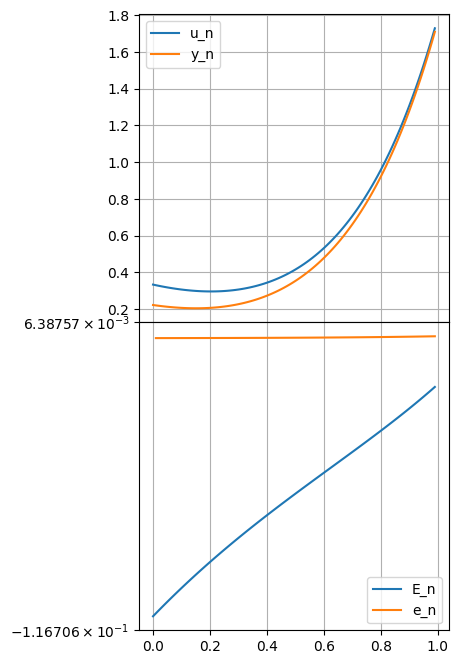

In [ ]:
N = 100
h = 0.01
F = lambda t,u: -u + t*(math.e**(2*t))
exacta = lambda x: (1/3)*(math.e**(-x)) + ((1/3)*x - (1/9))*(math.e**(2*x))

t, u, E, e = pvi_euler(0, 1/3, F, exacta, h, N)
Y = [exacta(n) for n in t]

fig, axs = plt.subplots(nrows=2, ncols=1, sharex= True, figsize=(4,8), gridspec_kw={"hspace":0})

axs[0].plot(t,u,label="u_n")
axs[0].plot(t,Y,label="y_n")
axs[1].plot(t,E,label="E_n")
axs[1].plot(t,e,label="e_n")
plt.yscale("symlog")
for i in range(2):
  axs[i].legend()
  axs[i].grid()
plt.show()

#### Convergencia de Euler explícito
$\lim\limits_{\substack{h\to 0\\t_n\text{ fijo}}} E_n = 0 \Rightarrow \text{ Método convergente en }t_n$
###### (Ejemplo lineal)

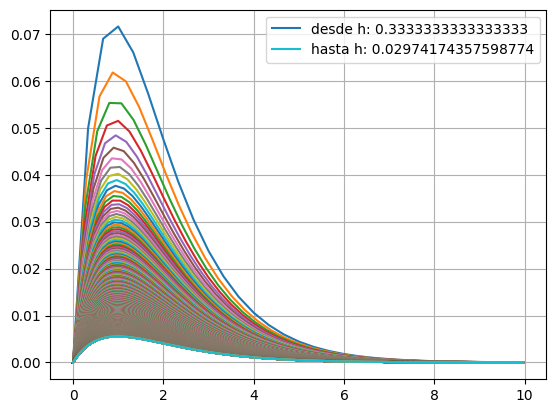

In [ ]:
M=1000
for i in range(M):
  h = 1/(math.sqrt(i+1)+2) # h tendiendo a 0
  N = round(10*(math.sqrt(i+1)+2)) # Cantidad de pasos necesarios para cada h
  F = lambda t,u: -u+t+1
  exacta = lambda x: math.e**(-x)+x

  t, u, E, e = pvi_euler(0, 1, F, exacta, h, N)

  lbl = "desde h: " + str(h) if i==0 else "hasta h: " + str(h) if i==(M-1) else None
  plt.plot(t,E,label=lbl)
plt.grid()
plt.legend()

#### Ahora, si añadimos un error inicial,
#### $\lim\limits_{\substack{h\to 0\\t_n\text{ iniciales}}} E_n ≠ 0 \Rightarrow \text{ ? }$

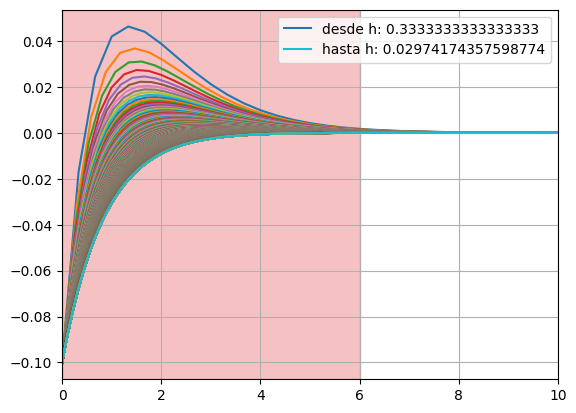

In [ ]:
M=1000
for i in range(M):
  h = 1/(math.sqrt(i+1)+2) # h tendiendo a 0
  N = round(10*(math.sqrt(i+1)+2)) # Cantidad de pasos necesarios para cada h
  F = lambda t,u: -u+t+1
  exacta = lambda x: math.e**(-x)+x

  du = 0.1

  t, u, E, e = pvi_euler(0, 1+du, F, exacta, h, N)

  lbl = "desde h: " + str(h) if i==0 else "hasta h: " + str(h) if i==(M-1) else None
  plt.plot(t,E,label=lbl)
plt.axvspan(xmin=0, xmax=6, alpha=0.25, color="#DB080E")
plt.xlim((0,10))
plt.grid()
plt.legend()

#### Consistencia de Euler explícito
$\lim\limits_{\substack{h\to 0\\t_n\text{ fijo}}} e_{n+1} = 0 \Rightarrow \text{ Método consistente en }t_n$
###### (Ejemplo lineal)

In [ ]:
M=1000
for i in range(M):
  h = 1/(math.sqrt(i+1)+2) # h tendiendo a 0
  N = round(10*(math.sqrt(i+1)+2)) # Cantidad de pasos necesarios para cada h
  F = lambda t,u: -u+t+1
  exacta = lambda x: math.e**(-x)+x

  t, u, E, e = pvi_euler(0, 1, F, exacta, h, N)

  lbl = "desde h: " + str(h) if i==0 else "hasta h: " + str(h) if i==(M-1) else None
  plt.plot(t,e,label=lbl)
plt.grid()
plt.legend()

NameError: ignored


---


#### Acá puede que empiece a implementar diferente los algoritmos porque me acostumbré de otra manera en otras prácticas

---

## Problema
###### A resolver con los métodos de paso simple **Implícito ponderado** y **Runge Kutta** con distintos ordenes de precisión

#### $y' = -y + t^2 + 2t - 2,$
#### $y(0)=0$
#### En [0,2]

In [7]:
y = lambda t: t**2 - 2 + 2*(math.e**(-t)) 
f = lambda t,u: -u + t**2 + 2*t - 2
t_o, u_o = 0, 0
t_f = 2

#### Implícito ponderado

###### $u_{n+1} = u_n + h[β*f(t_{n+1},u_{n+1}) + (1-β)*f(t_n,u_n)]$
###### $u_{n+1} = u_n + h[β*(-u_{n+1}+t_{n+1}^2+2t_{n+1}-2) + (1-β)*(-u_n+t_n^2+2t_n-2)]$
###### $u_{n+1} = \frac{u_n + h[β*(t_{n+1}^2+2t_{n+1}-2) + (1-β)*(-u_n+t_n^2+2t_n-2)]}{1+hβ}$

In [8]:
def resolver_ponderado(u_o, T, h, beta=0):
  U = [u_o]
  for n in range(len(T)-1):
    U.append((U[n] + h*(beta*(T[n+1]**2 + 2*T[n+1] - 2) + (1-beta)*(-U[n] + T[n]**2 + 2*T[n] - 2))) / (1 + h*beta))
  return U

###### $β=1 \rightarrow \text{Euler puramente explícito}$ (Verdes)
###### $β=0 \rightarrow \text{Euler puramente implícito}$ (Rojos)
###### $β=\frac{1}{2} \rightarrow \text{Crank-Nicholson}$ (Azules)

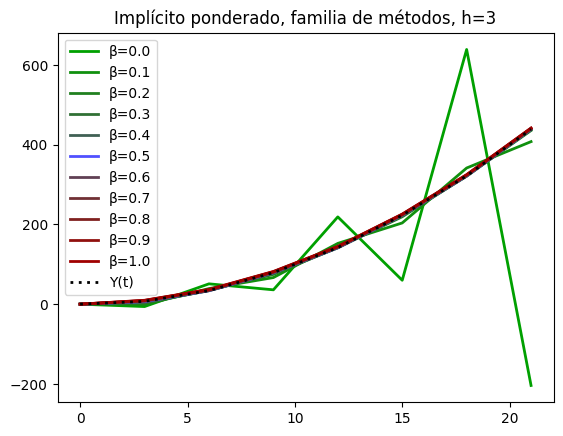

In [9]:
#@title h = 3 (Explícito inestable)
t_f = 20
h = 3
T = [i for i in np.arange(t_o, t_f+h, h)]
Y = [y(t) for t in T]

for b in np.arange(0,1.1,0.1):
  b=round(b,1)
  U = resolver_ponderado(u_o, T, h, beta=b)
  plt.plot(T, U, c=rgb_a_hex((round(160*b),round(160*(1-b)),round(-((abs(b-0.5)*(8.46E9))**(0.25))+255))), lw=2, label="β="+str(b))
plt.plot(T, Y, c="black", lw=2, ls="--", dashes=(1,2), label="Y(t)")
plt.legend()
plt.title("Implícito ponderado, familia de métodos, h=3")
t_f = 2 #Para volver al rango original

Text(0.5, 1.0, 'Implícito ponderado, familia de métodos, h=0.4')

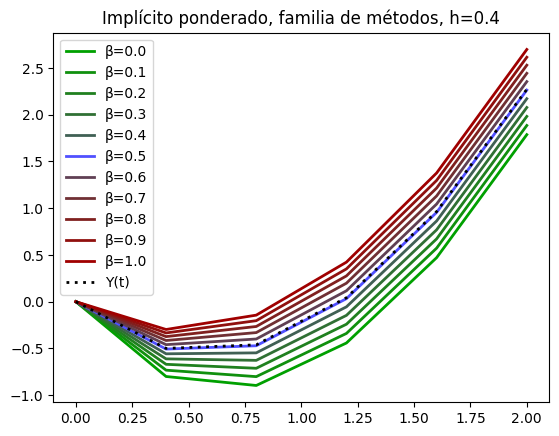

In [10]:
#@title h = 0.4
h = 0.4
T = [i for i in np.arange(t_o, t_f+h, h)]
Y = [y(t) for t in T]

for b in np.arange(0,1.1,0.1):
  b=round(b,1)
  U = resolver_ponderado(u_o, T, h, beta=b)
  plt.plot(T, U, c=rgb_a_hex((round(160*b),round(160*(1-b)),round(-((abs(b-0.5)*(8.46E9))**(0.25))+255))), lw=2, label="β="+str(b))
plt.plot(T, Y, c="black", lw=2, ls="--", dashes=(1,2), label="Y(t)")
plt.legend()
plt.title("Implícito ponderado, familia de métodos, h=0.4")

Text(0.5, 1.0, 'Implícito ponderado, familia de métodos, h=0.2')

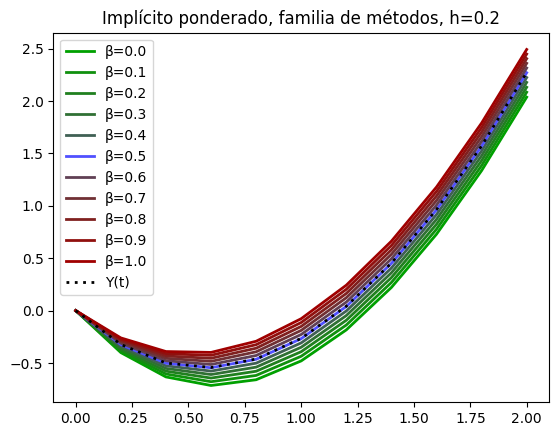

In [11]:
#@title h = 0.2
h = 0.2
T = [i for i in np.arange(t_o, t_f+h, h)]
Y = [y(t) for t in T]

for b in np.arange(0,1.1,0.1):
  b=round(b,1)
  U = resolver_ponderado(u_o, T, h, beta=b)
  plt.plot(T, U, c=rgb_a_hex((round(160*b),round(160*(1-b)),round(-((abs(b-0.5)*(8.46E9))**(0.25))+255))), lw=2, label="β="+str(b))
plt.plot(T, Y, c="black", lw=2, ls="--", dashes=(1,2), label="Y(t)")
plt.legend()
plt.title("Implícito ponderado, familia de métodos, h=0.2")

Text(0.5, 1.0, 'Implícito ponderado, familia de métodos, h=0.1')

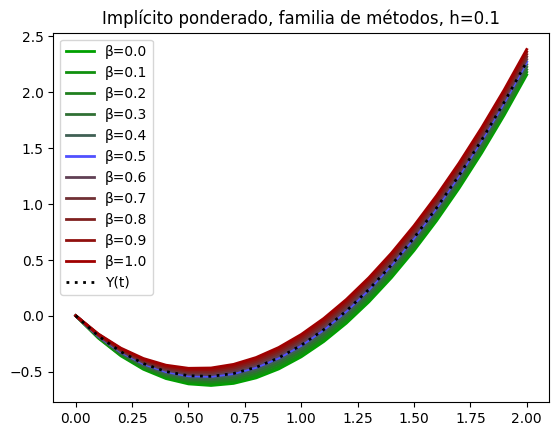

In [12]:
#@title h = 0.1
h = 0.1
T = [i for i in np.arange(t_o, t_f+h, h)]
Y = [y(t) for t in T]

for b in np.arange(0,1.1,0.1):
  b=round(b,1)
  U = resolver_ponderado(u_o, T, h, beta=b)
  plt.plot(T, U, c=rgb_a_hex((round(160*b),round(160*(1-b)),round(-((abs(b-0.5)*(8.46E9))**(0.25))+255))), lw=2, label="β="+str(b))
plt.plot(T, Y, c="black", lw=2, ls="--", dashes=(1,2), label="Y(t)")
plt.legend()
plt.title("Implícito ponderado, familia de métodos, h=0.1")

#### RK2

###### $k_1=h*f(t_n,u_n)$
###### $k_2=h*f(t_{n+1},u_n+k_1)$
###### $u_{n+1}=u_n+\frac{1}{2}(k_1+k_2)$

In [13]:
def resolver_RK2(F, u_o, T, h):
  U = [u_o]
  for n in range(len(T)-1):
    k1 = h*F(T[n],U[n])
    k2 = h*F(T[n+1],U[n]+k1)
    U.append(U[n] + (1/2)*(k1 + k2))
  return U

###### Para poder visualizar el error global en los gráficos sin tener que cambiar todo el formato anterior (sin subplots), se mostrará multiplicado por 10

Text(0.5, 1.0, 'RK2, h=0.4')

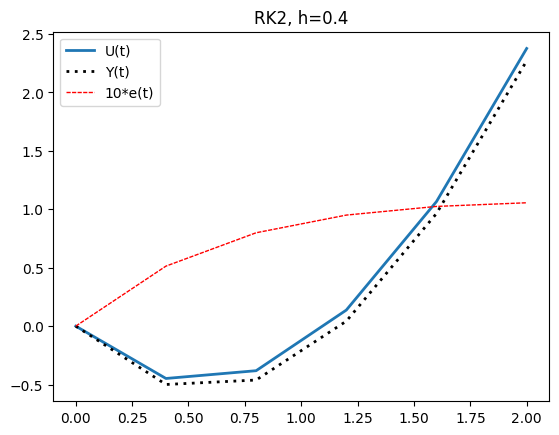

In [14]:
#@title h = 0.4
h = 0.4
T = [i for i in np.arange(t_o, t_f+h, h)]
Y = [y(t) for t in T]

U = resolver_RK2(f, u_o, T, h)
plt.plot(T, U, lw=2, label="U(t)")
plt.plot(T, Y, c="black", lw=2, ls="--", dashes=(1,2), label="Y(t)")
plt.plot(T, [10*abs(U[n]-Y[n]) for n in range(len(U))], c="red", lw=1, ls="--", dashes=(3,1), label="10*e(t)")
plt.legend()
plt.title("RK2, h=0.4")

Text(0.5, 1.0, 'RK2, h=0.2')

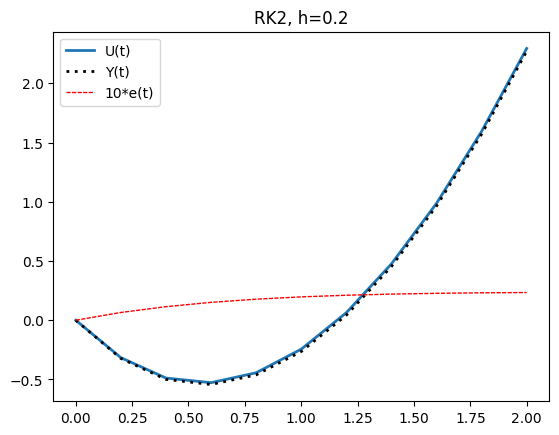

In [15]:
#@title h = 0.2
h = 0.2
T = [i for i in np.arange(t_o, t_f+h, h)]
Y = [y(t) for t in T]

U = resolver_RK2(f, u_o, T, h)
plt.plot(T, U, lw=2, label="U(t)")
plt.plot(T, Y, c="black", lw=2, ls="--", dashes=(1,2), label="Y(t)")
plt.plot(T, [10*abs(U[n]-Y[n]) for n in range(len(U))], c="red", lw=1, ls="--", dashes=(3,1), label="10*e(t)")
plt.legend()
plt.title("RK2, h=0.2")

Text(0.5, 1.0, 'RK2, h=0.1')

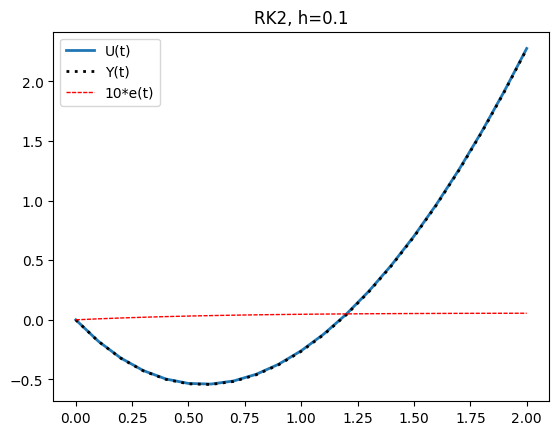

In [16]:
#@title h = 0.1
h = 0.1
T = [i for i in np.arange(t_o, t_f+h, h)]
Y = [y(t) for t in T]

U = resolver_RK2(f, u_o, T, h)
plt.plot(T, U, lw=2, label="U(t)")
plt.plot(T, Y, c="black", lw=2, ls="--", dashes=(1,2), label="Y(t)")
plt.plot(T, [10*abs(U[n]-Y[n]) for n in range(len(U))], c="red", lw=1, ls="--", dashes=(3,1), label="10*e(t)")
plt.legend()
plt.title("RK2, h=0.1")

#### RK4

###### $k_1=h*f(t_n,u_n)$
###### $k_2=h*f(t_{n+1}+\frac{h}{2},u_n+\frac{k_1}{2})$
###### $k_3=h*f(t_{n+1}+\frac{h}{2},u_n+\frac{k_2}{2})$
###### $k_4=h*f(t_{n+1},u_n+k_3)$
###### $u_{n+1}=u_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4)$

In [17]:
def resolver_RK4(F, u_o, T, h):
  U = [u_o]
  for n in range(len(T)-1):
    k1 = h*F(T[n], U[n])
    k2 = h*F(T[n]+h/2, U[n]+k1/2)
    k3 = h*F(T[n]+h/2, U[n]+k2/2)
    k4 = h*F(T[n+1], U[n]+k3)
    U.append(U[n] + (1/6)*(k1 + 2*k2 + 2*k3 + k4))
  return U

###### La precisión de RK4 es absurda, así que en este caso se mostrará la curva del error global incrementada en cuatro órdenes de magnitud

Text(0.5, 1.0, 'RG4, h=0.4')

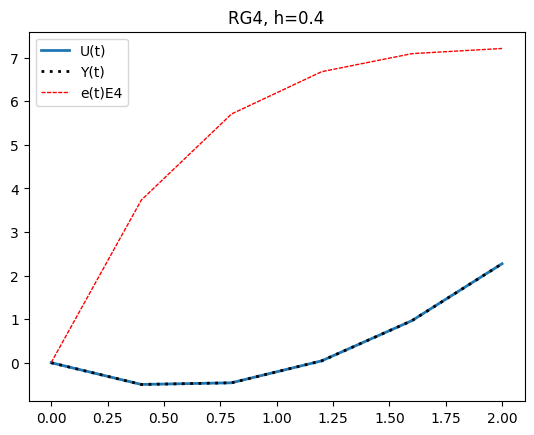

In [18]:
#@title h = 0.4
h = 0.4
T = [i for i in np.arange(t_o, t_f+h, h)]
Y = [y(t) for t in T]

U = resolver_RK4(f, u_o, T, h)
plt.plot(T, U, lw=2, label="U(t)")
plt.plot(T, Y, c="black", lw=2, ls="--", dashes=(1,2), label="Y(t)")
plt.plot(T, [(1E4)*abs(U[n]-Y[n]) for n in range(len(U))], c="red", lw=1, ls="--", dashes=(3,1), label="e(t)E4")
plt.legend()
plt.title("RG4, h=0.4")

Text(0.5, 1.0, 'RK4, h=0.2')

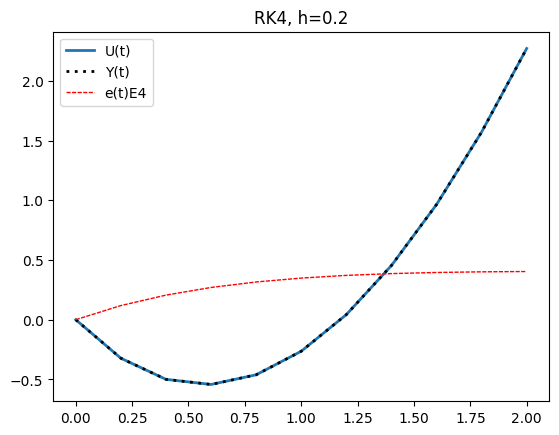

In [19]:
#@title h = 0.2
h = 0.2
T = [i for i in np.arange(t_o, t_f+h, h)]
Y = [y(t) for t in T]

U = resolver_RK4(f, u_o, T, h)
plt.plot(T, U, lw=2, label="U(t)")
plt.plot(T, Y, c="black", lw=2, ls="--", dashes=(1,2), label="Y(t)")
plt.plot(T, [(1E4)*abs(U[n]-Y[n]) for n in range(len(U))], c="red", lw=1, ls="--", dashes=(3,1), label="e(t)E4")
plt.legend()
plt.title("RK4, h=0.2")

Text(0.5, 1.0, 'RK4, h=0.1')

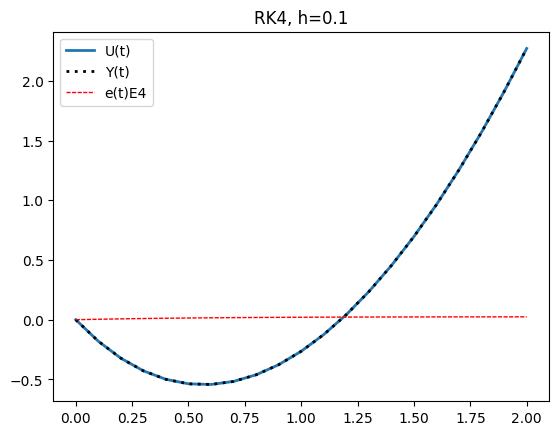

In [20]:
#@title h = 0.1
h = 0.1
T = [i for i in np.arange(t_o, t_f+h, h)]
Y = [y(t) for t in T]

U = resolver_RK4(f, u_o, T, h)
plt.plot(T, U, lw=2, label="U(t)")
plt.plot(T, Y, c="black", lw=2, ls="--", dashes=(1,2), label="Y(t)")
plt.plot(T, [(1E4)*abs(U[n]-Y[n]) for n in range(len(U))], c="red", lw=1, ls="--", dashes=(3,1), label="e(t)E4")
plt.legend()
plt.title("RK4, h=0.1")

## Problema
###### A resolver con los métodos multipaso **Adams-Bashforth** (explícito) y **Adams-Moulton** (implícito) con distintos ordenes de precisión

#### $y' = -5y,$
#### $y(0)=1$

In [21]:
y = lambda t: math.e**(-5*t)
f = lambda t,u: -5*u
t_o, u_o = 0, 1
t_f = 5

### AB2, AB3, AB4

In [22]:
def resolver_AB(F, U, T, h, o):
  M, C = [h/2, h/12, h/24], [[3,-1], [23,-16,5], [55,-59,37,-9]]
  for n in range(o-1, len(T)-1):
    u = 0
    for i in range(len(C[o-2])):
      u += C[o-2][i]*F(T[n-i], U[n-i])
    u *= M[o-2]
    u += U[n]
    U.append(u)
  return U

def desarrollo_AB(h, arranque, o):
  T = [i for i in np.arange(t_o, t_f+h, h)]
  Y = [y(t) for t in T]
  U = arranque(f, u_o, T[:o], h)
  U = resolver_AB(f, U, T, h, o)
  plt.plot(T, U, lw=2, label="U(t)")
  plt.plot(T, Y, c="black", lw=2, ls="--", dashes=(1,2), label="Y(t)")
  Me = 10 if o==2 else 100
  plt.plot(T, [Me*abs(U[n]-Y[n]) for n in range(len(U))], c="red", lw=1, ls="--", dashes=(3,1), label=str(Me)+"*e(t)")
  plt.legend()
  o_arr = 2 if o==2 else 4 
  plt.title("AB"+str(o)+" con arranque RK"+str(o_arr)+", h="+str(h))

###### AB2

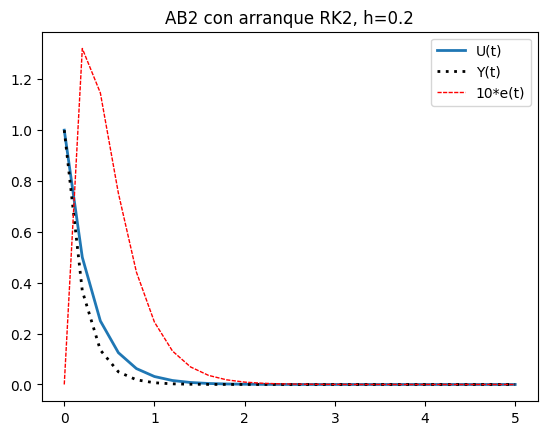

In [ ]:
#@title h = 0.2
desarrollo_AB(0.2, resolver_RK2, 2)

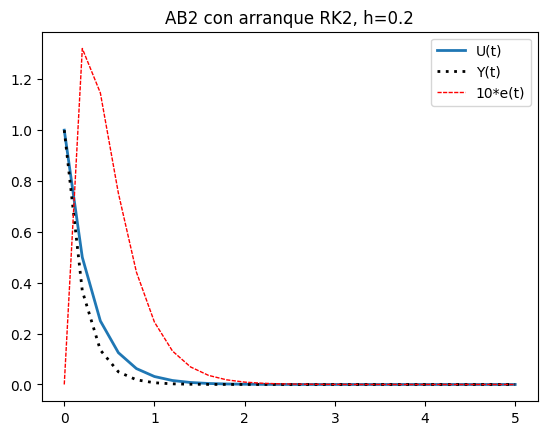

In [23]:
#@title h = 0.2
desarrollo_AB(0.2, resolver_RK2, 2)

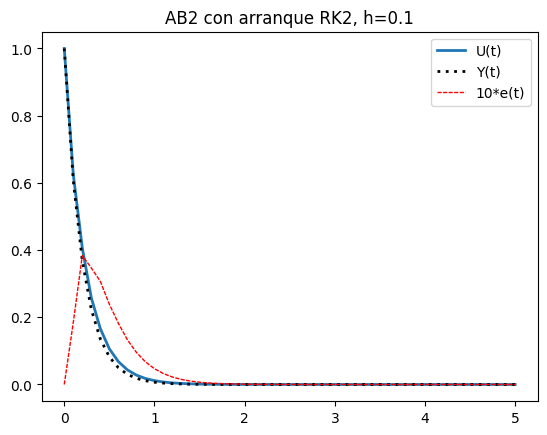

In [24]:
#@title h = 0.1
desarrollo_AB(0.1, resolver_RK2, 2)

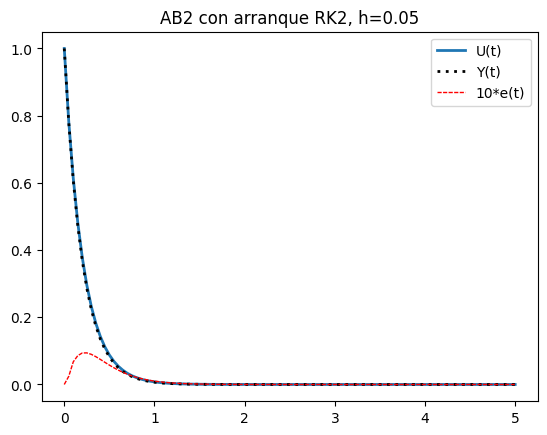

In [ ]:
#@title h = 0.05
desarrollo_AB(0.05, resolver_RK2, 2)

###### AB3

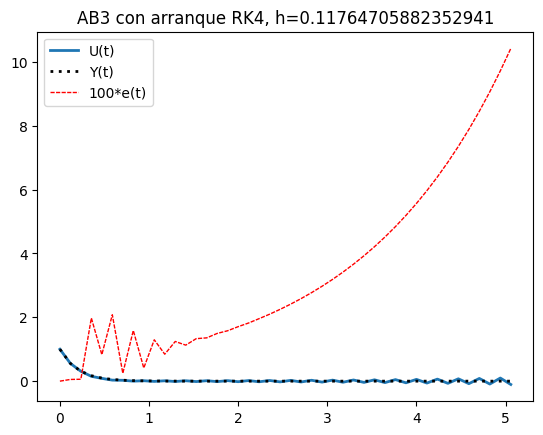

In [36]:
#@title h = 6/51 (inestable)
desarrollo_AB(6/51, resolver_RK4, 3)

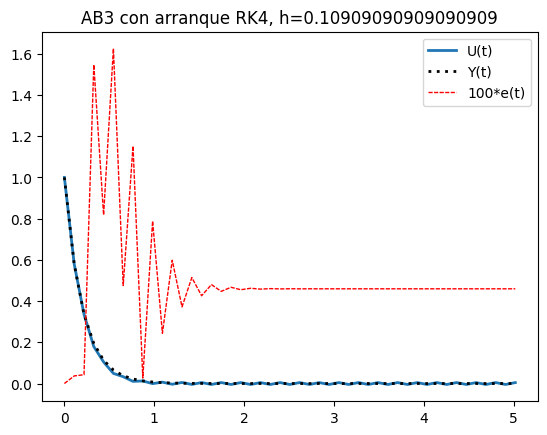

In [33]:
#@title h = 6/55 (limite de estabilidad)
desarrollo_AB(6/55, resolver_RK4, 3)

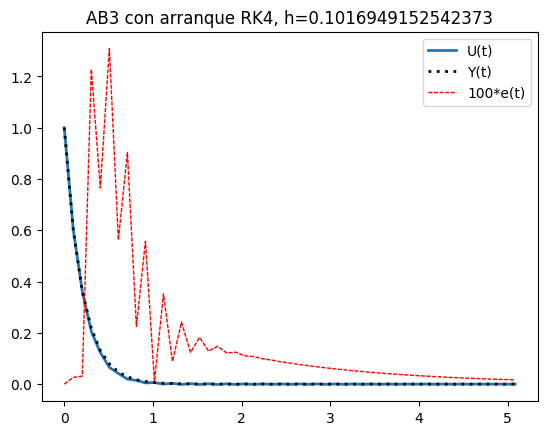

In [34]:
#@title h = 6/59 (Vuelve a ser estable)
desarrollo_AB(6/59, resolver_RK4, 3)

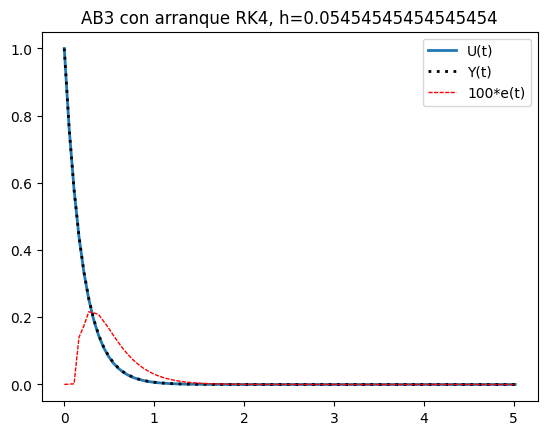

In [38]:
#@title h = 3/55 (estable)
desarrollo_AB(3/55, resolver_RK4, 3)

###### AB4

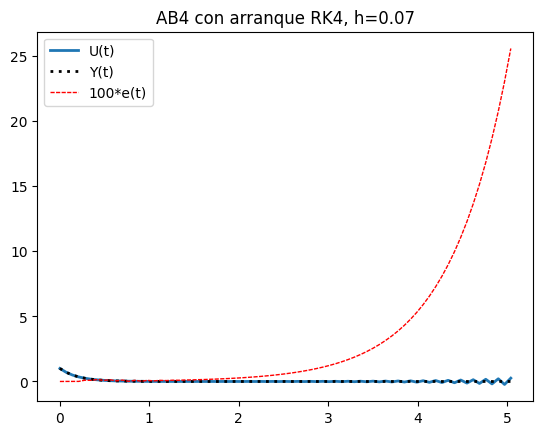

In [58]:
#@title h = 0.07
desarrollo_AB(0.07, resolver_RK4, 4)

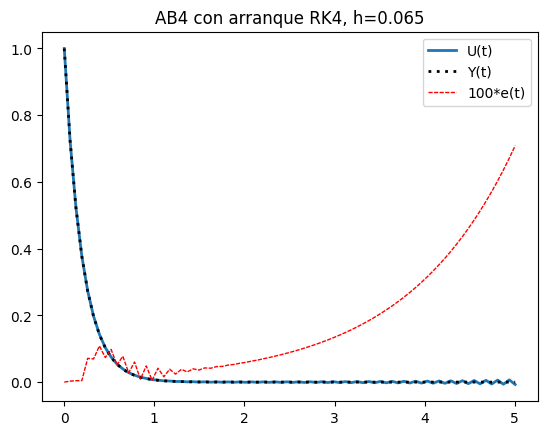

In [57]:
#@title h = 0.065
desarrollo_AB(0.065, resolver_RK4, 4)

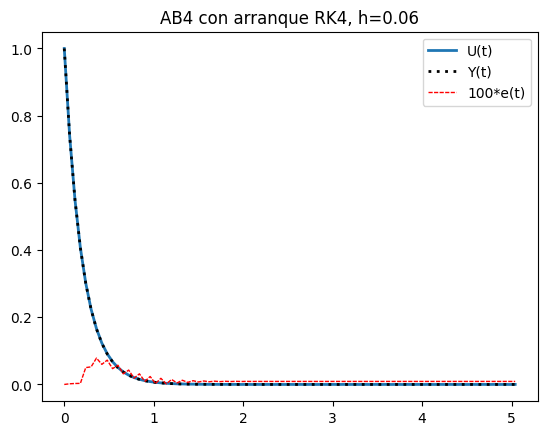

In [52]:
#@title h = 0.06 (Límite de estabilidad?)
desarrollo_AB(0.06, resolver_RK4, 4)

#### Explicación estabilidad AB3 y AB4

###### $u_{n+1} = u_n + \frac{h}{12}(23(-5u_n)-16(-5u_{n-1})+5(-5u_{n-2}))$
###### $u_{n+1} = (1-\frac{115}{12}h)u_n+(\frac{20}{3}h)u_{n-1}+(-\frac{25}{12}h)u_{n-2}$
###### $u_{n+1}+δu_{n+1} = (1-\frac{115}{12}h)(u_n+δu_n)+(\frac{20}{3}h)(u_{n-1}+δu_{n-1})+(-\frac{25}{12}h)(u_{n-2}+δu_{n-2})$
###### Restando las 2 anteriores y planteando obviedades matemáticas:
###### $δu_{n+1} = (1-\frac{115}{12}h)δu_n+(\frac{20}{3}h)δu_{n-1}+(-\frac{25}{12}h)δu_{n-2}$
###### $δu_n = (1)δu_n+(0)δu_{n-1}+(0)δu_{n-2}$
###### $δu_{n-1} = (0)δu_n+(1)δu_{n-1}+(0)δu_{n-2}$
###### $\rightarrow
\begin{bmatrix}
u_{n+1} \\
u_n \\
u_{n-1} \\
\end{bmatrix} = \begin{bmatrix}
1-\frac{115}{12}h & \frac{20}{3}h & -\frac{25}{12}h \\
1 & 0 & 0 \\
0 & 1 & 0 \\
\end{bmatrix}\begin{bmatrix}
u_n \\
u_{n-1} \\
u_{n-2} \\
\end{bmatrix}
$
###### Cuyos autovalores serán las raices de la ecuación:
###### $λ^3+(\frac{115}{12}h-1)λ^2-\frac{20}{3}hλ+\frac{25}{12}h$
###### Experimentalmente, se puede concluir que dichos AVAs serán menores a 1 en módulo solo si h ϵ (0, 6/55)

###### Por otro lado, aplicando AB4 y sin un análisis de estabilidad más que experimental, se puede inferir que hay un límite de estabilidad en h=0.6 para la aplicación de dicho método en este problema

### AM2, AM3, AM4